<a href="https://colab.research.google.com/github/FerRamirez-cpu/challenge-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Calculando el total por tienda
total_ingresos_tienda  = tienda["Precio"].sum()
total_ingresos_tienda2 = tienda2["Precio"].sum()
total_ingresos_tienda3 = tienda3["Precio"].sum()
total_ingresos_tienda4 = tienda4["Precio"].sum()

print(f"El total de ingresos de la tienda 1 es: {total_ingresos_tienda}, tienda 2 es: {total_ingresos_tienda2}, el de la tienda 3 es: {total_ingresos_tienda3}y de la tienda 4 es: {total_ingresos_tienda4}")

El total de ingresos de la tienda 1 es: 1150880400.0, tienda 2 es: 1116343500.0, el de la tienda 3 es: 1098019600.0y de la tienda 4 es: 1038375700.0


In [ ]:
import matplotlib.pyplot as plt

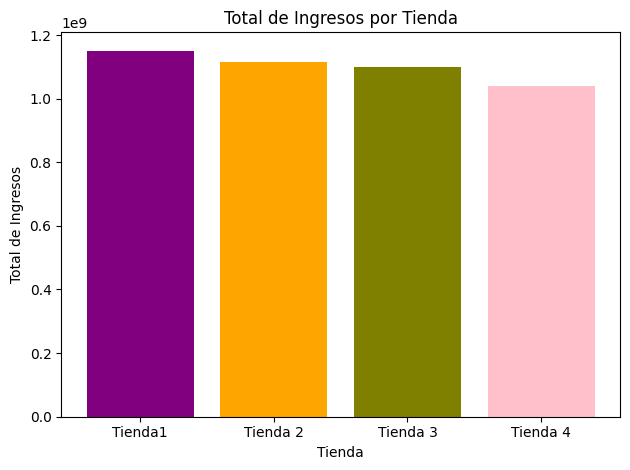

In [ ]:
nombres_tiendas = ["Tienda1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [total_ingresos_tienda, total_ingresos_tienda2, total_ingresos_tienda3, total_ingresos_tienda4]

colores = ['purple', 'orange', 'olive', 'pink']
plt.bar(nombres_tiendas, ingresos,color=colores)
plt.title("Total de Ingresos por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Total de Ingresos")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda